In [63]:
Alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

Unscaled = [8.2, 1.5, 2.8, 4.3, 12.7, 2.2, 2.0, 6.1, 7.0, 0.15, 0.77, 4.0, 2.4, 6.7, 7.5, 1.9, 0.095, 6.0, 6.3, 9.1, 2.8, 0.98, 2.4, 0.15, 2.0, 0.074]

EnglishFreqs = [i/100 for i in Unscaled]

def CleanText(Text):   #Removes all characters that are not a space or in the English alphabet.
    CleanText = ""
    for Char in Text:
        if Char.upper() in Alphabet or Char == " ":
            CleanText = CleanText + Char.upper()
    return(CleanText)

def RemoveSpaces(Text):   #Removes all spaces
    NoSpaceText = ""
    for Char in Text:
        if Char.upper() in Alphabet:
            NoSpaceText = NoSpaceText + Char.upper()
    return(NoSpaceText)

def CharacterCount(Text):   #Counts the number of times each letter appears in Text.
    CharacterCount = [0] * 26
    for Char in Text:
        if Char.upper() in Alphabet:
            k = Alphabet.index(Char.upper())
            CharacterCount[k] = CharacterCount[k] + 1
    return(CharacterCount)

def Frequencies(Text):   #Gives the frequency of each letter in Text
    LenNoSpaces = len(RemoveSpaces(CleanText(Text)))
    Frequencies = [i/LenNoSpaces for i in CharacterCount(Text)]
    return(Frequencies)

def CompareFreqs(Freqs1, Freqs2):   #Produces a bar chart comparing two frequency distributions.
    Freqs1Spaced = []
    Freqs2Spaced = []
    for i in range(26):
        Freqs1Spaced.append(Freqs1[i])
        Freqs1Spaced.append(0)
        Freqs1Spaced.append(0)
        Freqs2Spaced.append(0)
        Freqs2Spaced.append(Freqs2[i])
        Freqs2Spaced.append(0)
    G=Graphics()
    G += bar_chart(Freqs1Spaced, axes = False, width = 0.8)
    G += bar_chart(Freqs2Spaced, rgbcolor=(1,0,0), axes = False, width = 0.8)
    return(G)

def Grouping(Text, Group):   #Arranges the input text into groups of size Group.
    Count = 0
    GroupedText = ""
    for Char in Text:
        if Char.upper() in Alphabet:
            if Count > 0 and Count % Group == 0:
                GroupedText = GroupedText + " " + Char.upper()
            else:
                GroupedText = GroupedText + Char.upper()
            Count = Count + 1
    return(GroupedText)

def ShiftEncryption(Text, Shift):   #Encrypts Text by shifting each letter by the number Shift.
    CryptText = ""
    for Char in Text:
        if Char == " ":
            CryptText = CryptText + " "
        elif Char.upper() in Alphabet:
            CryptText = CryptText + Alphabet[(Alphabet.index(Char.upper()) + Shift) % 26]
    return(CryptText)

def ShiftDecryption(Text, Shift):   #Reverses ShiftEncryption
    DecryptText = ShiftEncryption(Text, -Shift)
    return(DecryptText)

def SubEncryption(Text, Permutation):   #Encryption using a substitution cipher
    PermAlphabet = Permutation.action(Alphabet)
    CryptText = ""
    for Char in Text:
        if Char.upper() in Alphabet:
            CryptText = CryptText+PermAlphabet[Alphabet.index(Char)]
        else:
            CryptText = CryptText + Char
    return CryptText

def SubDecryption(Text, Permutation):    #Decryption using a substitution cipher
    return SubEncryption(Text, Permutation.inverse())

def IndexOfCoincidence(Text):
    CharacterCount = [0] * 26   #Initialise a list of 26 copies of 0.
    for Char in Text:
        if Char.upper() in Alphabet:   #Loop over every character in the input test, exclude non-letters.
            i = Alphabet.index(Char.upper())   #Find the position of the character in the alphabet.
            CharacterCount[i] = CharacterCount[i] + 1   #Add 1 to the position of that character.
    Sum = 0
    N = len(RemoveSpaces(CleanText(Text)))   #N is the total number of letters in the input. We ignore spaces.
    for i in CharacterCount:
        if i > 0:
            Sum = Sum + ( i * (i-1) ) / ( N * (N-1) )
    return(Sum.numerical_approx(digits = 4))

def IndexOfCoincidence(Text):
    CharacterCount = [0] * 26  
    for Char in Text:
        if Char.upper() in Alphabet:   
            i = Alphabet.index(Char.upper())   
            CharacterCount[i] = CharacterCount[i] + 1  
    Sum = 0
    N = len(RemoveSpaces(CleanText(Text)))  
    for i in CharacterCount:
        if i > 0:
            Sum = Sum + ( i * (i-1) ) / ( N * (N-1) )
    return(Sum.numerical_approx(digits = 4))

def RandomText(Length):   #Generates a text with Length characters, chosen uniformly at random.
    Text = ""
    Count = 0
    while Count < Length:
        Text = Text + Alphabet[floor(random()*26)]
        Count = Count + 1
    return(Text)

def VigenereEncryption(Text, Key):   #Encrypts Text using the Vigenere ciper with Key as the keyword.
    NumKey = []
    for Char in Key:
        NumKey.append(Alphabet.index(Char.upper()))
    LenKey = len(Key)
    CryptText = ""
    Count = 0
    for i in range(len(Text)):
        Char = Text[i].upper()
        if Char.upper() in Alphabet:
            CryptText = CryptText + Alphabet[(Alphabet.index(Char) + NumKey[Count % LenKey]) % 26]
            Count = Count + 1
        else:
            CryptText = CryptText + Char
    return(CryptText)

def VigenereDecryption(Text, Key):   #Decrypts Text using the Vigenere ciper with Key as the keyword.
    NumKey = []
    for Char in Key:
        NumKey.append(Alphabet.index(Char.upper()))
    LenKey = len(Key)
    Decrypt = ""
    Count = 0
    for i in range(len(Text)):
        Char = Text[i].upper()
        if Char.upper() in Alphabet:
            Decrypt = Decrypt + Alphabet[(Alphabet.index(Char) - NumKey[Count % LenKey]) % 26]
            Count = Count + 1
        else:
            Decrypt = Decrypt + Char
    return(Decrypt)

def PeriodicTexts(Text, Period):   #Extracts every (Period)th letter from Text, starting with position 0,1,2,...
    PeriodicTexts = [""] * Period
    NewText = RemoveSpaces(CleanText(Text))
    for i in range(len(NewText)):
        PeriodicTexts[i % Period] = PeriodicTexts[i % Period] + NewText[i]
    return(PeriodicTexts)

def ChiSquared(Text, Period, StartingPosition):
    ExtractedText = PeriodicTexts(Text, Period)[StartingPosition]   #ExtractedText consists of every (Period)th letter, starting with StartingPosition
    N = len(ExtractedText)
    Counts = CharacterCount(ExtractedText)   #This counts the number of times each letter appears in ExtractedText.
    ChiValues = []
    for Shift in range(26):
        Chi = 0
        for i in range(26):
            ShiftedFreq = EnglishFreqs[(i - Shift) % 26]   #This is the frequency of letter i, shifted by Shift positions.
            Chi = Chi + (Counts[i] - ShiftedFreq * N)^2 / (ShiftedFreq * N)
        ChiValues.append(Chi)
    return(bar_chart(ChiValues))

In [64]:
Permutation = Permutations(26).random_element()

In [65]:
Text='RITE OF SPRING'

In [66]:
SubEncryption(Text, Permutation)

'HIRU TB DEHICF'

In [67]:
SubDecryption('CEDY RH PUCEMB', Permutation)

'NPSV TR ZENPBF'

In [68]:
TestText = CleanText("The various patterns of activity are thought to be mainly antipredator adaptations, though some could equally well be predatory adaptations.[4] Many predators forage most intensively at night, whereas others are active at midday and see best in full sun. The crepuscular habit may both reduce predation pressure, increasing the crepuscular populations, and offer better foraging opportunities to predators that increasingly focus their attention on crepuscular prey until a new balance is struck. Such shifting states of balance are often found in ecology. Some predatory species adjust their habits in response to competition from other predators. For example, the subspecies of short-eared owl that lives on the Galápagos Islands is normally active during the day, but on islands like Santa Cruz that are home to the Galapagos hawk, the owl is crepuscular.[5][6] Apart from the relevance to predation, crepuscular activity in hot regions also may be the most effective way of avoiding heat stress while capitalizing on available light.")
TestText

'THE VARIOUS PATTERNS OF ACTIVITY ARE THOUGHT TO BE MAINLY ANTIPREDATOR ADAPTATIONS THOUGH SOME COULD EQUALLY WELL BE PREDATORY ADAPTATIONS MANY PREDATORS FORAGE MOST INTENSIVELY AT NIGHT WHEREAS OTHERS ARE ACTIVE AT MIDDAY AND SEE BEST IN FULL SUN THE CREPUSCULAR HABIT MAY BOTH REDUCE PREDATION PRESSURE INCREASING THE CREPUSCULAR POPULATIONS AND OFFER BETTER FORAGING OPPORTUNITIES TO PREDATORS THAT INCREASINGLY FOCUS THEIR ATTENTION ON CREPUSCULAR PREY UNTIL A NEW BALANCE IS STRUCK SUCH SHIFTING STATES OF BALANCE ARE OFTEN FOUND IN ECOLOGY SOME PREDATORY SPECIES ADJUST THEIR HABITS IN RESPONSE TO COMPETITION FROM OTHER PREDATORS FOR EXAMPLE THE SUBSPECIES OF SHORTEARED OWL THAT LIVES ON THE GALPAGOS ISLANDS IS NORMALLY ACTIVE DURING THE DAY BUT ON ISLANDS LIKE SANTA CRUZ THAT ARE HOME TO THE GALAPAGOS HAWK THE OWL IS CREPUSCULAR APART FROM THE RELEVANCE TO PREDATION CREPUSCULAR ACTIVITY IN HOT REGIONS ALSO MAY BE THE MOST EFFECTIVE WAY OF AVOIDING HEAT STRESS WHILE CAPITALIZING ON AVA

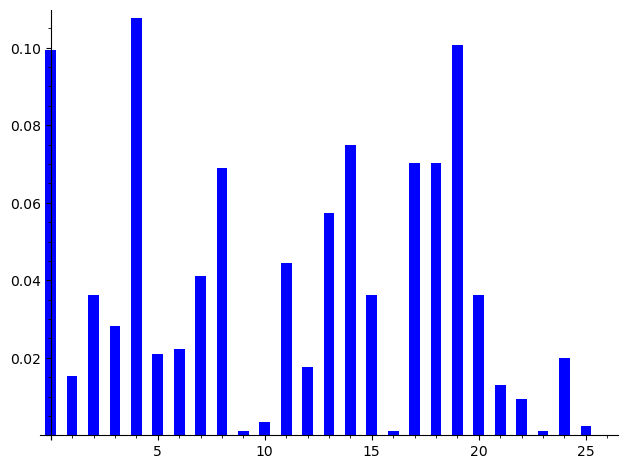

In [69]:
bar_chart(Frequencies(TestText))

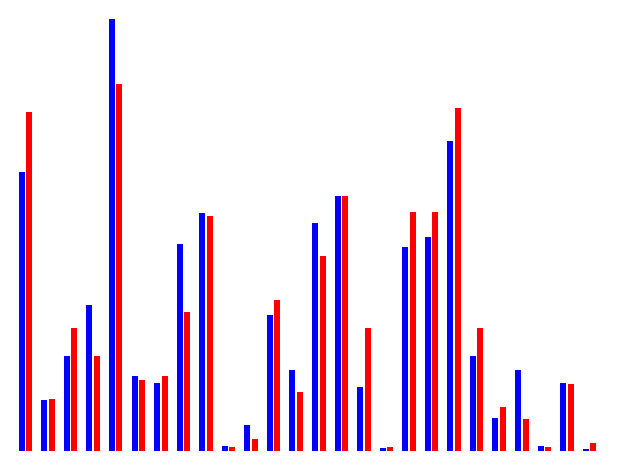

In [70]:
CompareFreqs(EnglishFreqs, Frequencies(WikiText))

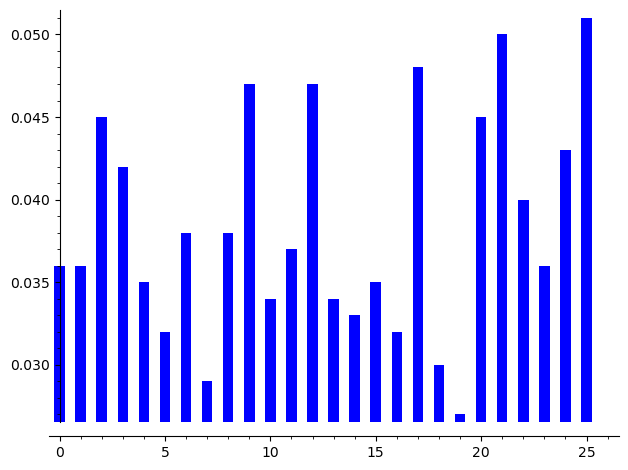

In [71]:
bar_chart(Frequencies(RandomText(1000)))

In [72]:
IndexOfCoincidence(RandomText(1000))

0.03902

In [73]:
IndexOfCoincidence(TestText)

0.06466

In [78]:
PlainText=Grouping(RemoveSpaces(CleanText('History is the systematic study of the past, focusing primarily on the human past. As an academic discipline, it analyses and interprets evidence to construct narratives about what happened and explain why and how it happened. Some theorists categorize history as a social science, while others see it as part of the humanities or consider it a hybrid discipline. Similar debates surround the purpose of history—for example, whether its main aim is theoretical, to uncover the truth, or practical, to learn lessons from the past. In a more general sense, the term history refers not to an academic field but to the past itself, times in the past, or to individual texts about the past.')),5)
PlainText

'HISTO RYIST HESYS TEMAT ICSTU DYOFT HEPAS TFOCU SINGP RIMAR ILYON THEHU MANPA STASA NACAD EMICD ISCIP LINEI TANAL YSESA NDINT ERPRE TSEVI DENCE TOCON STRUC TNARR ATIVE SABOU TWHAT HAPPE NEDAN DEXPL AINWH YANDH OWITH APPEN EDSOM ETHEO RISTS CATEG ORIZE HISTO RYASA SOCIA LSCIE NCEWH ILEOT HERSS EEITA SPART OFTHE HUMAN ITIES ORCON SIDER ITAHY BRIDD ISCIP LINES IMILA RDEBA TESSU RROUN DTHEP URPOS EOFHI STORY FOREX AMPLE WHETH ERITS MAINA IMIST HEORE TICAL TOUNC OVERT HETRU THORP RACTI CALTO LEARN LESSO NSFRO MTHEP ASTIN AMORE GENER ALSEN SETHE TERMH ISTOR YREFE RSNOT TOANA CADEM ICFIE LDBUT TOTHE PASTI TSELF TIMES INTHE PASTO RTOIN DIVID UALTE XTSAB OUTTH EPAST'

In [81]:
CryptText = VigenereEncryption(PlainText, 'PANIC')
CryptText

'WIFBQ GYVAV WEFGU IEZIV XCFBW SYBNV WECIU IFBKW HIAOR GIZIT XLLWP IHRPW BAAXC HTNAC CAPIF TMVKF XSPQR AIAMK IAAIN NSRAC CDVVV TRCZG ISRDK SEAKG IOPWP HTECE INNZT PTVDG HAOWW IWUIV WACXG CEQIP SEKXN PIAEJ NAALJ DWVBJ PPCMP TDFWO TTUMQ GIFBU RAGMI DRVHG WIFBQ GYNAC HOPQC ASPQG CCREJ XLRWV WEEAU TEVBC HPNZV DFGPG WUZIP XTVMU DRPWP HIQMT XTNPA QRVLF XSPQR AIAMU XMVTC GDRJC IEFAW GRBCP STUMR JRCWU TOSPK HTBZA UOEMZ PMCTG LHRBJ TRVBU BAVVC XMVAV WEBZG IIPIN IOHVE DVRZV WEGZW IHBZR GAPBK RAYBQ AENZP AEFAQ CSSZQ BTUMR PSGQP PMBZG VEAMT PLFMP HEGPG IEEUJ XSGWT NRRNG GSAWV IONVC RAQMO XCSQG ADOCV IOGPG EAFBK ISRTH IIZMU XNGPG EAFBQ GTBQP SIIQF JAYBG MTFID DUGBJ TPNAV'

In [82]:
PeriodicTexts(CryptText, 3)

['WBYVFIICWBWIFWAGILPRBXTCPTKSRAIISCVTZSKAIWTENPDAWUWXEPKPEAJVPMDOUGBAIVWBYCPAQCJRWAECNDPUPVDWITNQLSRAXTDCFGCTRCTPTAEPTHJVBVMVBIIOERWZHRPRBEPFCZTRGPZETFHPEJGNNSVNRMCGOIPAKRIMNGFGQIFYMIUJN',
 'IQVWGEVFSNEUBHOITLIPACNCIMFPAMANRCVRGRSKOPEIZTGOIIAGQSXIJADBPPFTMIUGDHIQNHQSGRXWEUVHZFGZXMRPQXPRFPAMMCRIARPUJWOKBUMMGRTBACVWZINHDZEWBGBAQNAASQUPQMGAPMEGEXWRGAIVAOSACOGFITIUGEBTPIJBTDGTA',
 'FGAEUZXBYVCIKIRZXWHWAHAAFVXQIKANADVCIDEGPHCNTVHWWVCCIENANLWJCTWTQFRMRGFGAOCPCELVETBPVGWITUPHMTAVXQIUVGJEWBSMRUSHZOZCLBRUVXAEGPIVVVGIZAKYAZEQSBMSPBVMLPGIUSTRGWOCQXQDVGEBSHZXPAQBSQAGFDBPV']

In [83]:
IndexOfCoincidence(PeriodicTexts(CryptText, 6)[3])

0.04945

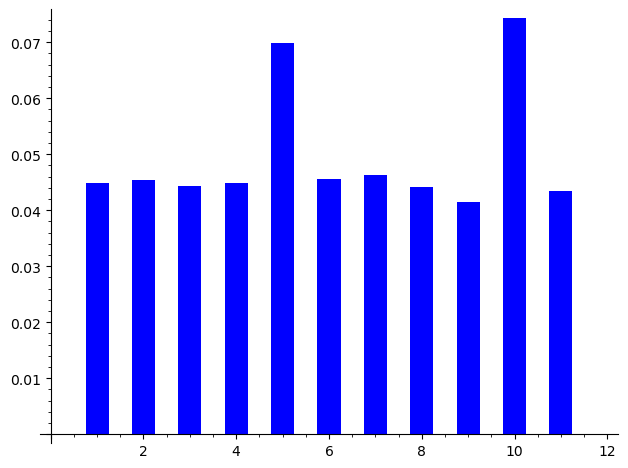

In [84]:
MeanIndices = [0]
for Period in range(1,12):
    PTexts = PeriodicTexts(CryptText, Period)
    Indices = []
    for i in range(Period):
        Indices.append(IndexOfCoincidence(PTexts[i]))
    MeanIndices.append(mean(Indices))
bar_chart(MeanIndices)

In [87]:
PTexts = PeriodicTexts(CryptText, 5)
PTexts

['WGWIXSWIHGXIBHCTXAINCTISIHIPHIWCSPNDPTTGRDWGHACXWTHDWXDHXQXAXGIGSJTHUPLTBXWIIDWIGRAACBPPVPHIXNGIRXAIEIIXEGSJMDT',
 'IYEECYEFIILHATAMSIASDRSEOTNTAWAEEIAWPDTIARIYOSCLEEPFUTRITRSIMDERTROTOMHRAMEIOVEHAAEESTSMELEESRSOACDOASINATIATUP',
 'FVFZFBCBAZLRANPVPAARVCRAPENVOUCQKAAVCFUFGVFNPPRREVNGZVPQNVPAVRFBUCSBECRVVVBPHRGBPYNFSUGBAFGEGRANQSOGFRZGFBIYFGN',
 'BAGIBNIKOIWPXAIKQMIAVZDKWCZDWIXIXELBMWMBMHBAQQEWABZPIMWMPLQMTJACMWPZMTBBVAZIVZZZBBZAZMQZMMPUWNWVMQCPBTMPBQQBIBA',
 'QVUVWVUWRTPWCCFFRKNCVGKGPETGWVGPNJJJPOQUIGQCCGJVUCVGPUPTAFRUCCWPRUKAZGJUCVGNEVWRKQPQQRPGTPGJTGVCOGVGKHUGQPFGDJV']

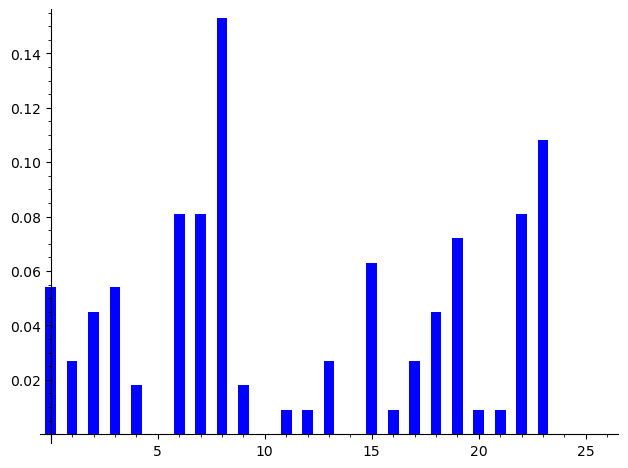

In [90]:
bar_chart(Frequencies(PTexts[0]))

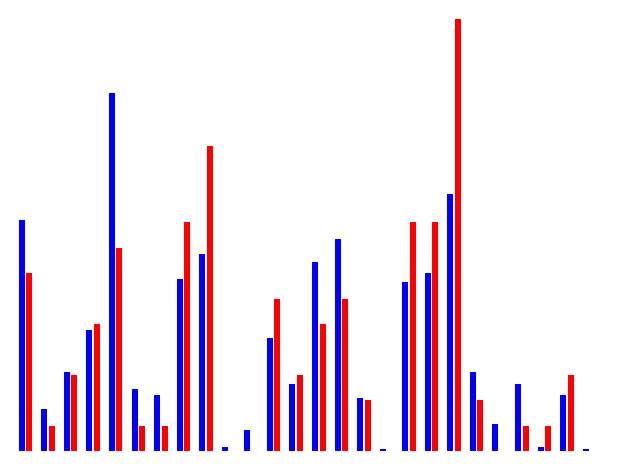

In [94]:
CompareFreqs(EnglishFreqs, Frequencies(ShiftEncryption(PTexts[0],-15)))

In [106]:
Alphabet[15]

'P'

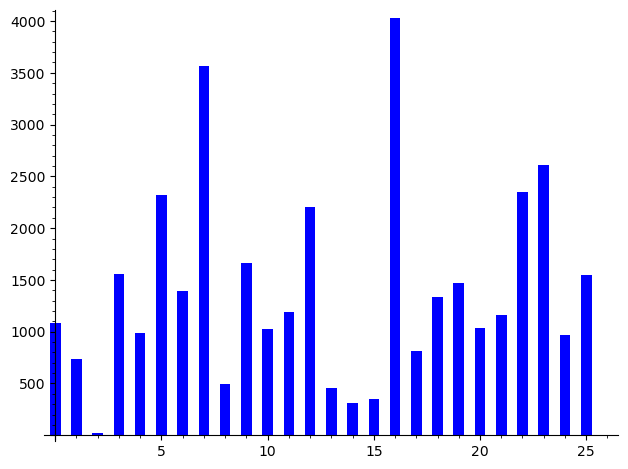

In [104]:
ChiSquared(CryptText, 5, 4)

In [108]:
RemoveSpaces(VigenereDecryption(CryptText,'PANIC'))

'HISTORYISTHESYSTEMATICSTUDYOFTHEPASTFOCUSINGPRIMARILYONTHEHUMANPASTASANACADEMICDISCIPLINEITANALYSESANDINTERPRETSEVIDENCETOCONSTRUCTNARRATIVESABOUTWHATHAPPENEDANDEXPLAINWHYANDHOWITHAPPENEDSOMETHEORISTSCATEGORIZEHISTORYASASOCIALSCIENCEWHILEOTHERSSEEITASPARTOFTHEHUMANITIESORCONSIDERITAHYBRIDDISCIPLINESIMILARDEBATESSURROUNDTHEPURPOSEOFHISTORYFOREXAMPLEWHETHERITSMAINAIMISTHEORETICALTOUNCOVERTHETRUTHORPRACTICALTOLEARNLESSONSFROMTHEPASTINAMOREGENERALSENSETHETERMHISTORYREFERSNOTTOANACADEMICFIELDBUTTOTHEPASTITSELFTIMESINTHEPASTORTOINDIVIDUALTEXTSABOUTTHEPAST'

In [11]:
# Can you decode the following crypttext?

CryptText = "PBLPK GMZAE OBEEG RIGCZ TITBA NLSRW WJFWJ HWGWV ITURL LCMQF VMXBL RVMPM WFWZG KIYUL CIBRJ WKGMN ULEAI CLITM PRHPC RMEAW VTAXW HYBBU VIHXI GARIX DRJCG GMZQA KMPZW PGXIA VVCGO RVEVM IPCWC WLVLM QGIYE IVAWQ KEXTQ YSFNX BBLLG ITNQI TBVPD YFXSA GGMBV TGYVX VREMG LEVLL CWWBJ EPWNV FMUAQ AYQQO MFWEE AAGSK GAIFS ZCKQR VHGLQ TFGQF XBKIF HNYSV IXWCW RTHWZ KAKMP ZSRAP ILKJQ KMAWQ KXAGG ERIZB SGJMP RHPCR MEESU MKUST VXZFZ EXXBU WTNTG RJXCD MPGRV KWYGJ CWQSX ITXVG ULCKI PLITX IPZGJ TZNUX GKJRZ EXXAQ AJHXZ RFXNR XBKWG LAVFK WGQDM ICUQY AXKXA YAOGW WQYMP ZWEVI HXIGA RIHXC GRGGB FFSPE MGZEN EGFGQ GVPNJ EEMME KGCGK UGSUX NEGQC LMYWG VBWAG JYXIC GRUHZ ZSWML BUWPC MBRJS HPPVU LOHLV XMGLB UWMTT JVDMV BMFVI RXVQA RIHVG ZIOTA XULQL MA"
CryptText

'PBLPK GMZAE OBEEG RIGCZ TITBA NLSRW WJFWJ HWGWV ITURL LCMQF VMXBL RVMPM WFWZG KIYUL CIBRJ WKGMN ULEAI CLITM PRHPC RMEAW VTAXW HYBBU VIHXI GARIX DRJCG GMZQA KMPZW PGXIA VVCGO RVEVM IPCWC WLVLM QGIYE IVAWQ KEXTQ YSFNX BBLLG ITNQI TBVPD YFXSA GGMBV TGYVX VREMG LEVLL CWWBJ EPWNV FMUAQ AYQQO MFWEE AAGSK GAIFS ZCKQR VHGLQ TFGQF XBKIF HNYSV IXWCW RTHWZ KAKMP ZSRAP ILKJQ KMAWQ KXAGG ERIZB SGJMP RHPCR MEESU MKUST VXZFZ EXXBU WTNTG RJXCD MPGRV KWYGJ CWQSX ITXVG ULCKI PLITX IPZGJ TZNUX GKJRZ EXXAQ AJHXZ RFXNR XBKWG LAVFK WGQDM ICUQY AXKXA YAOGW WQYMP ZWEVI HXIGA RIHXC GRGGB FFSPE MGZEN EGFGQ GVPNJ EEMME KGCGK UGSUX NEGQC LMYWG VBWAG JYXIC GRUHZ ZSWML BUWPC MBRJS HPPVU LOHLV XMGLB UWMTT JVDMV BMFVI RXVQA RIHVG ZIOTA XULQL MA'